In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy

In [11]:
stop_mut_and_host_info_file = "stop_mut_and_host_info_by_tip.json"
with open(stop_mut_and_host_info_file, 'r') as infile:
    stop_by_tip = json.load(infile)

nonstop_mut_and_host_info_file = "no_stop_mut_and_host_info_by_tip.json"
with open(nonstop_mut_and_host_info_file, 'r') as infile:
    nonstop_by_tip = json.load(infile)

In [12]:
def extract_gene_lengths(genbank_file):
    gene_lengths = {}
    for record in SeqIO.parse(genbank_file, "genbank"):
        for feature in record.features:
            if feature.type == "mat_peptide": 
                gene_name = feature.qualifiers.get("product", ["unknown"])[0]
                gene_name = gene_name.replace(' protein', "")
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length / 3
            elif feature.type == "CDS":  
                gene_name = feature.qualifiers.get("gene", ["unknown"])[0]
                gene_length = len(feature.location)
                gene_lengths[gene_name.lower()] = gene_length / 3
        gene_lengths['rdrp'] = gene_lengths.pop("rna-dependent rna polymerase")
        gene_lengths['2Omethyltransferase'] = gene_lengths.pop("2'-o-methyltransferase")
    return gene_lengths

genbank_file = "../../../../nextstrain-build/phylogenetic_only_camels/defaults/mers_reference.gb"

gene_codon_counts = extract_gene_lengths(genbank_file)
gene_codon_counts["s1"] = 2196 / 3
gene_codon_counts["s2"] = 1806 / 3

print(gene_codon_counts)
print(stop_by_tip)

{'orf1ab': 4392.0, 'nsp1': 193.0, 'nsp2': 660.0, 'nsp3': 1887.0, 'nsp4': 507.0, 'nsp5': 306.0, 'nsp6': 292.0, 'nsp7': 83.0, 'nsp8': 199.0, 'nsp9': 110.0, 'nsp10': 140.0, 'hel': 598.0, 'exon': 524.0, 'nendou': 343.0, 'nsp11': 14.0, 's': 1354.0, 'orf3': 104.0, 'orf4a': 110.0, 'orf4b': 247.0, 'orf5': 225.0, 'e': 83.0, 'm': 220.0, 'n': 414.0, 'orf8b': 113.0, 'rdrp': 933.0, '2Omethyltransferase': 303.0, 's1': 732.0, 's2': 602.0}
{'KJ477102': {'region': 'Africa', 'host': 'Camel', 'date': 2013.6677696491379, 'muts_on_path': {}}, 'OP712624': {'region': 'Africa', 'host': 'Camel', 'date': 2016.6844262295083, 'muts_on_path': {'Orf4b': ['R206X', '*247X']}}, 'OP712625': {'region': 'Africa', 'host': 'Camel', 'date': 2016.6844262295083, 'muts_on_path': {'Orf4b': ['R206X', '*247X']}}, 'KJ477103': {'region': 'Africa', 'host': 'Camel', 'date': 2013.9986301369863, 'muts_on_path': {'Orf4b': ['R206X', '*247X']}}, 'OP906306': {'region': 'Africa', 'host': 'Camel', 'date': 2013.9986301369863, 'muts_on_path': 

In [13]:
all_genes = ['Orf3', 'Orf4b']
def calc_rates(mut_and_host_info_by_tip):
    data = []
    for tip, info in mut_and_host_info_by_tip.items():
        row = {'sample': tip, 'host': info['host'], 'date': info['date']}
        muts_on_path = info.get('muts_on_path', {})
        for gene in all_genes:
            num_mutations = len(muts_on_path.get(gene, []))
            gene = gene.lower()
            num_codons = gene_codon_counts[gene] 
            mutation_rate = num_mutations / num_codons
            row[gene] = mutation_rate
        data.append(row)
    return data, all_genes


stop_data, _ = calc_rates(stop_by_tip)
stop_df = pd.DataFrame(stop_data)
nonstop_data, all_genes = calc_rates(nonstop_by_tip)
nonstop_df = pd.DataFrame(nonstop_data)

print(stop_df)
print(nonstop_df)


       sample   host         date  orf3     orf4b
0    KJ477102  Camel  2013.667770   0.0  0.000000
1    OP712624  Camel  2016.684426   0.0  0.008097
2    OP712625  Camel  2016.684426   0.0  0.008097
3    KJ477103  Camel  2013.998630   0.0  0.008097
4    OP906306  Camel  2013.998630   0.0  0.008097
..        ...    ...          ...   ...       ...
408  MN758613  Camel  2017.015962   0.0  0.000000
409  MN758611  Camel  2017.082149   0.0  0.000000
410  MN758612  Camel  2017.003712   0.0  0.000000
411  MN758606  Camel  2017.004269   0.0  0.000000
412  MN758610  Camel  2017.004269   0.0  0.000000

[413 rows x 5 columns]
       sample   host         date      orf3     orf4b
0    KJ477102  Camel  2013.667770  0.000000  0.004049
1    OP712624  Camel  2016.684426  0.009615  0.008097
2    OP712625  Camel  2016.684426  0.009615  0.008097
3    KJ477103  Camel  2013.998630  0.009615  0.012146
4    OP906306  Camel  2013.998630  0.009615  0.012146
..        ...    ...          ...       ...       ..

<Figure size 640x480 with 0 Axes>

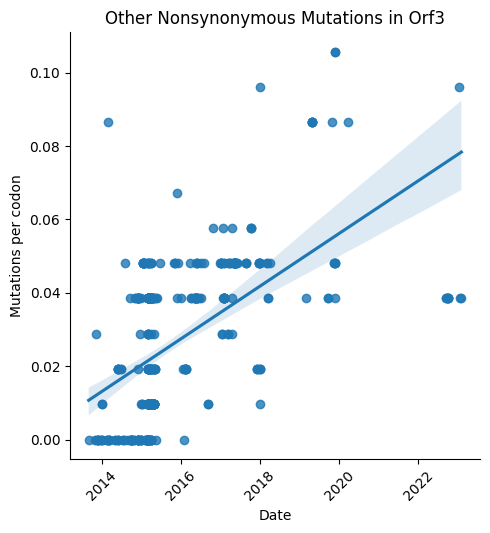

<Figure size 640x480 with 0 Axes>

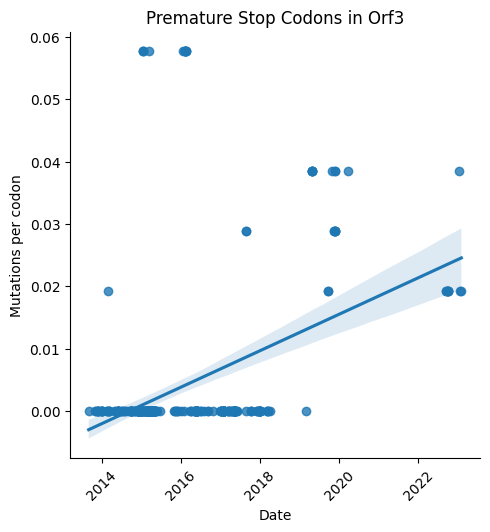

Nonstop slope: 0.0071809030761112785 mutations per codon per year
Stop slope: 0.0029208150654884313 mutations per codon per year
P-value: 1.910903311932952e-12


<Figure size 640x480 with 0 Axes>

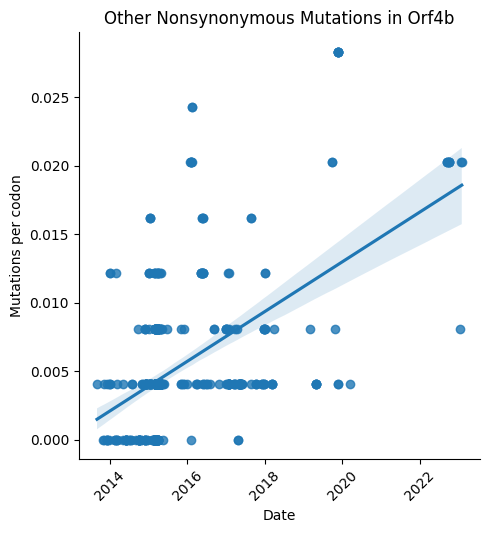

<Figure size 640x480 with 0 Axes>

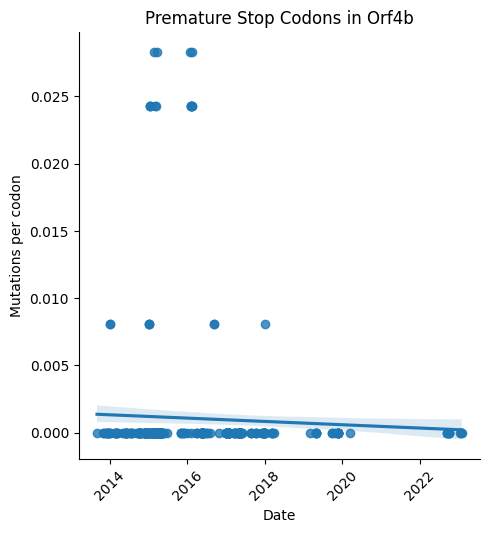

Nonstop slope: 0.001814715686526116 mutations per codon per year
Stop slope: -0.00012311341570075648 mutations per codon per year
P-value: 4.0041520811156286e-22


In [14]:
lin_regress = {}
lin_regress_all = {}
count = 0
for gene in all_genes:
    gene_lower = gene.lower()
    # Plot for Non-Synonymous Mutations
    plt.figure()
    sns.lmplot(x='date', y=gene_lower, data=nonstop_df)
    plt.title("Other Nonsynonymous Mutations in " + gene)
    plt.xlabel('Date')
    plt.ylabel('Mutations per codon')
    plt.xticks(rotation=45)
    plt.show()

    # Plot for Premature Stop Codons
    plt.figure()
    sns.lmplot(x='date', y=gene_lower, data=stop_df)
    plt.title("Premature Stop Codons in " + gene)
    plt.xlabel('Date')
    plt.ylabel('Mutations per codon')
    plt.xticks(rotation=45)
    plt.show()
    
    lin_regress[gene] = {}
    lin_regress_all[gene] = {}
    
    # Stop results
    x_stop = stop_df['date'].values
    y_stop = stop_df[gene_lower].values
    stop_slope, stop_intercept, stop_r, stop_p, stop_se = stats.linregress(x_stop, y_stop)
    lin_regress[gene]['Stop'] = stop_slope
    lin_regress_all[gene]['Stop'] = {'slope': stop_slope, 'intercept': stop_intercept, 'r': stop_r, 'p': stop_p, 'se': stop_se}

    # Non-Stop results
    x_nonstop = nonstop_df['date'].values
    y_nonstop = nonstop_df[gene_lower].values
    nonstop_slope, nonstop_intercept, nonstop_r, nonstop_p, nonstop_se = stats.linregress(x_nonstop, y_nonstop)
    lin_regress[gene]['Non-Stop'] = nonstop_slope
    lin_regress_all[gene]['Non-Stop'] = {'slope': nonstop_slope, 'intercept': nonstop_intercept, 'r': nonstop_r, 'p': nonstop_p, 'se': nonstop_se}
    
    # Z-test
    numerator = stop_slope - nonstop_slope
    denominator = ((stop_se ** 2) + (nonstop_se ** 2)) ** 0.5
    z = numerator / denominator
    p = scipy.stats.norm.sf(abs(z)) * 2
    
    count += 1
    print("Nonstop slope: " + str(nonstop_slope) + " mutations per codon per year"),
    print("Stop slope: " + str(stop_slope) + " mutations per codon per year"),
    print("P-value: " + str(p))


#print(lin_regress)
df_results = pd.DataFrame(lin_regress)
df_results_all = pd.DataFrame(lin_regress_all)
# linear_regression_results = df_results.to_csv('../../intermediate-results-downsampling/linear_regression_results.csv')
# linear_regression_results_all = df_results_all.to_csv('../../intermediate-results-downsampling/linear_regression_results_all.csv')
